## Project 2: Ames Housing Data and Kaggle Challenge

Author: Julie Vovchenko


---

# Problem Statement
By using Ames Housing Train Dataset, I want to create the best model that identifies best predictions of sale price of all houses in Test Dataset, including my friends (Mary and Ira) house, and send those predictions to Kaggle competition.  
In addition I want to identify best features that effect the home sale price the most of all houses in Ames Iowa, that can be used for potential remodeling by Mary and Ira.


# Executive Summary

### Table of Content:
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    -  [Import Packages and Data](#Import-Packages-and-Data)  
    -  [Renaming Columns (train/test)](#Renaming-Columns-(train/test)) 
    -  [Data Cleaning](#Data-Cleaning)
        -  [Imputing Missing Data (train)](#Imputing-Missing-data-(train))
        -  [Imputing Missing Data (test)](#Imputing-Missing-data-(test))    
        - [High Level Checks](#High-Level-Checks)
- [Feature Engineering](#Feature-Engineering)  
    - [Interactions (Synergies) Creation](#Interactions-(Synergies)-Creation)
    - [Dummie Variable Creation](#Dummie-Variable-Creation)
- [Preprocessing](#Preprocessing)
- [Modeling](#Modeling)
    - [Linear Regression](#Linear-Regression)
    - [Ridge Regression](#Linear-Regression)
    - [Lasso Regression](#Lasso-Regression)
    - [Friends House Sale Price Prediction](#Friends-House-Sale-Price-Prediction)
    - [Kaggle Competition Test Predictions](#Kaggle-Competition-Test-Predictions)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)




### Datasets and Dictionary

- [Ames Housing Data (train dataset)](../data/train.csv)
- [Ames Housing Data (test dataset)](../data/test.csv)
- [Data Dictionary](../data/data_dictionary.txt)

## Exploratory Data Analysis

### Import Packages and Data

In [1]:
#Importing Libraries: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing libraries from sklearn
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Importing libraries for Ridge and Lasso Regression Models:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LassoCV

In [2]:
#reading and assigning housing data train.csv to 'df' dataframe 
#and test.csv to 'test_df'
df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

In [3]:
#Viewing the train dataset
df.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000


In [4]:
#Viewing the size of the train and test dataframe
print(f'test_df shape:{df.shape}')
print(f'test_df shape:{test_df.shape}')

test_df shape:(2051, 81)
test_df shape:(878, 80)


In [5]:
#the difference btw the df and test_df is "SalePrice" column
set(df) - set(test_df)

{'SalePrice'}

**Observation:**  
The train Kaggle Housing Datasets is quite detailed, it consists of 81 columns of features for each house sold. The test dataframe is similar format dataset with an exeption of 'SalePrice' column. Planing on to get a more detailed view of the columns and looking for potential missing data.

### Renaming Columns (train/test)

In [6]:
#Vewing our train dataset columns and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

**Note:**  
Before I start to work with the dataframe I plan to rename all the columns in both dataframes, so it will be easier to work with them.

In [7]:
#Renaming columns
#Creating dictionary of old and new columns for future replace
new_columns_dict = {
    'Id':            'id',
    'PID':           'pid',
    'MS SubClass':   'ms_subclass',
    'MS Zoning':     'ms_zoning',
    'Lot Frontage':  'lot_frontage',
    'Lot Area':      'lot_area',
    'Street':        'street',
    'Alley':         'alley',
    'Lot Shape':     'lot_shape',
    'Land Contour':   'land_contour',
    'Utilities':      'utilities',
    'Lot Config':     'lot_config',
    'Land Slope':     'land_slope',
    'Neighborhood':   'neighborhood',
    'Condition 1':    'condition1',
    'Condition 2':    'condition2',
    'Bldg Type':      'bldg_type',
    'House Style':    'house_style',
    'Overall Qual':   'overall_qc',
    'Overall Cond':   'overall_cond',
    'Year Built':     'yr_built',
    'Year Remod/Add': 'yr_remodeled',
    'Roof Style':     'roof_style',
    'Roof Matl':      'roof_material',
    'Exterior 1st':   'exterior1',
    'Exterior 2nd':   'exterior2',
    'Mas Vnr Type':   'masonry_vnr_type',
    'Mas Vnr Area':   'masonry_vnr_area',
    'Exter Qual':     'exter_qc',
    'Exter Cond':     'exter_cond',
    'Foundation':     'foundation',
    'Bsmt Qual':      'bsmt_qc',
    'Bsmt Cond':      'bsmt_cond',
    'Bsmt Exposure':  'bsmt_exposure',
    'BsmtFin Type 1': 'bsmt_fin_type1',
    'BsmtFin SF 1':   'bsmt_fin_sqft1',
    'BsmtFin Type 2': 'bsmt_fin_type2',
    'BsmtFin SF 2' :  'bsmt_fin_sqft2',
    'Bsmt Unf SF':    'bsmt_unf_sqft',
    'Total Bsmt SF':  'total_bsmt_area',
    'Heating':        'heating',
    'Heating QC':     'heating_qc',
    'Central Air':    'centail_air',
    'Electrical':     'electr_system',
    '1st Flr SF':     '1st_floor_sqft',
    '2nd Flr SF':     '2st_floor_sqft',
    'Low Qual Fin SF': 'low_quality_fin_sqft',
    'Gr Liv Area':    'abv_grd_area',
    'Bsmt Full Bath': 'bsmt_full_bath',
    'Bsmt Half Bath': 'bsmt_half_bath',
    'Full Bath':      'full_bath',
    'Half Bath':      'half_bath',
    'Bedroom AbvGr':   'bedrooms',
    'Kitchen AbvGr':   'kitchen_abvgr',
    'Kitchen Qual':   'kitchen_qc',
    'TotRms AbvGrd':  'total_rooms',
    'Functional':     'functional',
    'Fireplaces':     'fireplaces',
    'Fireplace Qu':   'fireplace_qc',
    'Garage Type':    'garage_type',
    'Garage Yr Blt':  'garage_yr_built',
    'Garage Finish':  'garage_finish',
    'Garage Cars':    'garage_cars',
    'Garage Area':    'garage_area',
    'Garage Qual':    'garage_qc',
    'Garage Cond':    'garage_cond',
    'Paved Drive':    'paved_drway',
    'Wood Deck SF':   'wood_deck_sqft',
    'Open Porch SF':  'open_porch_sqft',
    'Enclosed Porch': 'enclosed_porch_area',
    '3Ssn Porch':     '3season_porch_area',
    'Screen Porch':   'screen_porch_area',
    'Pool Area':      'pool_area',
    'Pool QC':        'pool_qc',
    'Fence':          'fence_qc',
    'Misc Feature':   'misc_feature',
    'Misc Val':       'misc_value',
    'Mo Sold':        'mo_sold',
    'Yr Sold':        'yr_sold',
    'Sale Type':      'sale_type',
    'SalePrice':      'sale_price',
   
}

#Replacing old column names with new
df.rename(columns = new_columns_dict, inplace=True)


In [8]:
#renaming all columns in test_df. Remove 'SalePrice' from column dictionary, 
#since it has no column with this name
del new_columns_dict['SalePrice']
test_df.rename(columns = new_columns_dict, inplace=True)

In [9]:
#set index to out id column in train and test dataframes
df.set_index('id', inplace = True)
test_df.set_index('id', inplace = True)

In [10]:
#Converting all values of 'ms_subclass' to objects in both dataframes, to use
#this column for dummie_conversion
df['ms_subclass'] = df['ms_subclass'].astype(str)
test_df['ms_subclass'] = test_df['ms_subclass'].astype(str)

In [11]:
#Checking the previous changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
pid                     2051 non-null int64
ms_subclass             2051 non-null object
ms_zoning               2051 non-null object
lot_frontage            1721 non-null float64
lot_area                2051 non-null int64
street                  2051 non-null object
alley                   140 non-null object
lot_shape               2051 non-null object
land_contour            2051 non-null object
utilities               2051 non-null object
lot_config              2051 non-null object
land_slope              2051 non-null object
neighborhood            2051 non-null object
condition1              2051 non-null object
condition2              2051 non-null object
bldg_type               2051 non-null object
house_style             2051 non-null object
overall_qc              2051 non-null int64
overall_cond            2051 non-null int64
yr_built                2051 non-null int6

---

## Data Cleaning

### Imputing Missing data (train)

**Note:**  
Using data dictionary (see link above) I decided to impute those columns with null values to what they actually correspond to in data dictionary. For example, those houses that don't have a basement are missing the information for other columns that refer to that basement, like square footage or quality. Same for columns that describe pool, garage, fence or other features.

In [12]:
#Based on values in data_dictionary file, replacing all Nan values in columns with object type values 
#For 'alley' column
df['alley'] = df['alley'].fillna('No Alley')

#For 'masonry_vnr_type' column
df['masonry_vnr_type'] = df['masonry_vnr_type'].fillna('None')

#For all columns with object basement-related variables. If there is no basement in the house
#than all related to the basement features will be either zero or 'No Basement'
df['bsmt_qc'] = df['bsmt_qc'].fillna('No Basement')
df['bsmt_cond'] = df['bsmt_cond'].fillna('No Basement')
df['bsmt_exposure'] = df['bsmt_exposure'].fillna('No Basement')
df['bsmt_fin_type1'] = df['bsmt_fin_type1'].fillna('No Basement')
df['bsmt_fin_type2'] = df['bsmt_fin_type2'].fillna('No Basement')

#For 'fireplace_qc' column
df['fireplace_qc'] = df['fireplace_qc'].fillna('No Fireplace')

#For all columns with object garage-related variables. If there is no garage in the house
#than all related to the basement features will be either zero or 'No Garage'
df['garage_type'] = df['garage_type'].fillna('No Garage')
df['garage_finish'] = df['garage_finish'].fillna('No Garage')
df['garage_qc'] = df['garage_qc'].fillna('No Garage')
df['garage_cond'] = df['garage_cond'].fillna('No Garage')

#For columns for 'pool_qc', 'fence_qc', and 'misc_feature' 
df['pool_qc'] = df['pool_qc'].fillna('No Pool')
df['fence_qc'] = df['fence_qc'].fillna('No Fence')
df['misc_feature'] = df['misc_feature'].fillna('None')

#adding zero values to other masonry veneer desriptive columns for rows with 'no basement'
df.loc[df.masonry_vnr_type == 'None', 'masonry_vnr_area'] = 0

#adding zero values to other basement desriptive columns for rows with 'no basement'
df.loc[df.bsmt_fin_type1 == 'No Basement', 'bsmt_fin_sqft1'] = 0
df.loc[df.bsmt_fin_type2 == 'No Basement', 'bsmt_fin_sqft2'] = 0
df.loc[df.bsmt_qc == 'No Basement', 'bsmt_unf_sqft'] = 0
df.loc[df.bsmt_qc == 'No Basement', 'total_bsmt_area'] = 0
df.loc[df.bsmt_qc == 'No Basement', 'bsmt_full_bath'] = 0
df.loc[df.bsmt_qc == 'No Basement', 'bsmt_half_bath'] = 0

#adding zero values to other garage desriptive columns for rows with 'no garage'
df.loc[df.garage_type == 'No Garage', 'garage_yr_built'] = 0
df.loc[df.garage_type == 'No Garage', 'garage_cars'] = 0    
df.loc[df.garage_type == 'No Garage', 'garage_area'] = 0   
  

**Note:**  
After the above mentioned substitution I now going to check Null values for columns that actually miss data. 

In [13]:
#checking all columns with sum of null values more than zero
#(Noah C helped me to put my idea into code)
df.isnull().sum()[df.isnull().sum() > 0]

lot_frontage       330
garage_yr_built      1
garage_cars          1
garage_area          1
dtype: int64

In [14]:
#CHECKING LOT_FRONTAGE
#Lets see the details for all lot_frontage
df['lot_frontage'].describe()

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: lot_frontage, dtype: float64

**Observation:**  
I have several options to set make-up data for missing values in lot_frontage:
1. set missing values to mean (69)
1. break into subgroups 25/50/75% and set mean for each subgroup
2. or scrape exact values from official govermental cites

Since we have limitted time for this project and the correlation to the sale_price is only 0.3, i decided to go with setting with mean for missing lot_frontage. 

In [15]:
#imputing missing values in lot_frontage to mean of all lot frontages in dataset
df['lot_frontage'] = df['lot_frontage'].fillna(df['lot_frontage'].mean())

In [16]:
#checking where we have missing data again
df.isnull().sum()[df.isnull().sum() > 0]

garage_yr_built    1
garage_cars        1
garage_area        1
dtype: int64

In [17]:
#Checking all rows with null values in train dataset
df[df[['garage_yr_built', 
       'garage_cars', 
       'garage_area']].isnull().any(axis=1)]

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,screen_porch_area,pool_area,pool_qc,fence_qc,misc_feature,misc_value,mo_sold,yr_sold,sale_type,sale_price
id,,,,,,,,,,,,,,,,,,,,,
2237,910201180,70,RM,50.0,9060,Pave,No Alley,Reg,Lvl,AllPub,...,0,0,No Pool,MnPrv,None,0,3,2007,WD,150909


**Observation:**  
There are two ways of handeling a null value for missing garage information:  
1. I can google the information for this house and impute the actual value, or  
2. I can delete the row.  

Since it is only one row from total of 2051 deciding to remove the row.

In [18]:
#decided to remove this row from dataframe
df.drop([2237], inplace=True)

In [19]:
#checking where we have any more missing data
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

**Observation:**  
The train dataset is now clean from nulls.

### Imputing Missing data (test)

**Observation:**  
Using the same aproach for the test dataset by using the data dictionary.    

In [20]:
#Based on values in data_dictionary file, replacing all Nan values in columns with object type values 
#For 'alley' column
test_df['alley'] = test_df['alley'].fillna('No Alley')

#For 'masonry_vnr_type' column
test_df['masonry_vnr_type'] = test_df['masonry_vnr_type'].fillna('None')

#For all columns with basement variables. If there is no basement in the house
#than all related to the basement features will be either zero or 'No Basement'
test_df['bsmt_qc'] = test_df['bsmt_qc'].fillna('No Basement')
test_df['bsmt_cond'] = test_df['bsmt_cond'].fillna('No Basement')
test_df['bsmt_exposure'] = test_df['bsmt_exposure'].fillna('No Basement')
test_df['bsmt_fin_type1'] = test_df['bsmt_fin_type1'].fillna('No Basement')
test_df['bsmt_fin_type2'] = test_df['bsmt_fin_type2'].fillna('No Basement')

#For 'fireplace_qc' column
test_df['fireplace_qc'] = test_df['fireplace_qc'].fillna('No Fireplace')

#For all columns with object garage-related variables. If there is no garage in the house
#than all related to the basement features will be either zero or 'No Garage'
test_df['garage_type'] = test_df['garage_type'].fillna('No Garage')
test_df['garage_finish'] = test_df['garage_finish'].fillna('No Garage')
test_df['garage_qc'] = test_df['garage_qc'].fillna('No Garage')
test_df['garage_cond'] = test_df['garage_cond'].fillna('No Garage')

#For columns for 'pool_qc', 'fence_qc', and 'misc_feature' 
test_df['pool_qc'] = test_df['pool_qc'].fillna('No Pool')
test_df['fence_qc'] = test_df['fence_qc'].fillna('No Fence')
test_df['misc_feature'] = test_df['misc_feature'].fillna('None')

#adding zero values to other masonry desriptive columns for rows with 'no masonry'
test_df.loc[test_df.masonry_vnr_type == 'None', 'masonry_vnr_area'] = 0

#adding zero values to other garage desriptive columns for rows with 'no garage'
test_df.loc[test_df.garage_type == 'No Garage', 'garage_yr_built'] = 0

In [21]:
#checking where we have missing data
test_df.isnull().sum()[test_df.isnull().sum() > 0]

lot_frontage       160
electr_system        1
garage_yr_built      1
dtype: int64

In [22]:
#CHECKING LOT_FRONTAGE
#Lets see the details for all lot_frontage
test_df['lot_frontage'].describe()

count    718.000000
mean      69.545961
std       23.533945
min       21.000000
25%       59.000000
50%       68.000000
75%       80.000000
max      182.000000
Name: lot_frontage, dtype: float64

**Observation:**  
I have several options to set make-up data for missing values in lot_frontage:
1. set missing values to mean (69)
1. break into subgroups 25/50/75% and set mean for each subgroup
2. or scrape exact values from official govermental cites

Since we have limitted time for this project and the correlation to the sale_price is only 0.3, i decided to go with setting with mean for missing lot_frontage.

In [23]:
#imputing missing values in lot_frontage to mean of all lot frontages in dataset
test_df['lot_frontage'] = test_df['lot_frontage'].fillna(test_df['lot_frontage'].mean())

In [24]:
#checking rows with missing values in 'electr_system' 
test_df[test_df[['electr_system']].isnull().any(axis=1)]

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,3season_porch_area,screen_porch_area,pool_area,pool_qc,fence_qc,misc_feature,misc_value,mo_sold,yr_sold,sale_type
id,,,,,,,,,,,,,,,,,,,,,
1578,916386080,80,RL,73.0,9735,Pave,No Alley,Reg,Lvl,AllPub,...,0,0,0,No Pool,No Fence,None,0,5,2008,WD


In [25]:
#Deciding to impute null values with the mode (value that appears most frequest)
#of the electric_system column
#Finding the mode of through value_counts method
test_df['electr_system'].value_counts()

SBrkr    813
FuseA     48
FuseF     15
FuseP      1
Name: electr_system, dtype: int64

In [26]:
#Imputing 'SBrkr' into the cell with houses with missing 'electr_system'
test_df['electr_system'] = test_df['electr_system'].fillna('SBrkr')

In [27]:
#checking rows with missing values in and 'garage_yr_built'  
test_df[test_df[['garage_yr_built']].isnull().any(axis=1)]

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,3season_porch_area,screen_porch_area,pool_area,pool_qc,fence_qc,misc_feature,misc_value,mo_sold,yr_sold,sale_type
id,,,,,,,,,,,,,,,,,,,,,
1357,903426160,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,0,No Pool,MnPrv,Shed,1000,9,2008,WD


In [28]:
#Trying to see what years the house was built and remodeled
year_built = test_df[test_df[['garage_yr_built']].isnull().any(axis=1)]['yr_built'].iloc[0]
year_remodeled = test_df[test_df[['garage_yr_built']].isnull().any(axis=1)]['yr_remodeled'].iloc[0]

print(year_built, year_remodeled)

1910 1983


**Observation:**  
Looks like the house was built in 1910 and remodeled in 1983, so I assume that the year garage was built on 1983. So I decided to impute 1983 into this house 'garage_yr_built'.


In [29]:
#Imputing year_remodeled into cell for with missing 'garage_yr_built'
test_df['garage_yr_built'] = test_df['garage_yr_built'].fillna(year_remodeled)

In [30]:
test_df.shape

(878, 79)

In [31]:
#checking where we have missing data again
test_df.isnull().sum()[test_df.isnull().sum() > 0]

Series([], dtype: int64)

**Observation:**  
The test dataset is now clean from nulls.

---

### High Level Checks

**Note:**
On high level checks I decided to print a lists of all object unique variables for all object variable columns and then a separate descriptive table (with minimum, maximum, mean) for all numeric variable columns. 

In [32]:
#Creating a function that prints out all unique values for object value columns
#to see corrupt data and more
def print_unique(df):
    for column in df:
        if df[column].dtype == 'object':
            print (f"{column} uniques: {df[column].unique()}")
                   

In [33]:
#Printing all unique values for object value columns to see corrupt data and more
#in train dataset
print_unique(df)

ms_subclass uniques: ['60' '20' '50' '180' '160' '70' '120' '190' '85' '30' '90' '80' '75' '45'
 '40' '150']
ms_zoning uniques: ['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']
street uniques: ['Pave' 'Grvl']
alley uniques: ['No Alley' 'Pave' 'Grvl']
lot_shape uniques: ['IR1' 'Reg' 'IR2' 'IR3']
land_contour uniques: ['Lvl' 'HLS' 'Bnk' 'Low']
utilities uniques: ['AllPub' 'NoSeWa' 'NoSewr']
lot_config uniques: ['CulDSac' 'Inside' 'Corner' 'FR2' 'FR3']
land_slope uniques: ['Gtl' 'Sev' 'Mod']
neighborhood uniques: ['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'BrDale'
 'CollgCr' 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor'
 'IDOTRR' 'NWAmes' 'Veenker' 'MeadowV' 'SWISU' 'NoRidge' 'ClearCr'
 'Blmngtn' 'BrkSide' 'NPkVill' 'Blueste' 'GrnHill' 'Greens' 'Landmrk']
condition1 uniques: ['RRAe' 'Norm' 'PosA' 'Artery' 'Feedr' 'PosN' 'RRAn' 'RRNe' 'RRNn']
condition2 uniques: ['Norm' 'RRNn' 'Feedr' 'Artery' 'PosA' 'PosN' 'RRAe' 'RRAn']
bldg_type uniques: ['1Fam' 'TwnhsE' '

**Observation:**  
No values outside expected in object value columns in df.
    

In [34]:
#printing all unique values for object value columns to see corrupt data and more
print_unique(test_df)

ms_subclass uniques: ['190' '90' '60' '30' '20' '160' '120' '70' '80' '50' '85' '45' '75' '180'
 '40']
ms_zoning uniques: ['RM' 'RL' 'FV' 'RH' 'C (all)' 'I (all)']
street uniques: ['Pave' 'Grvl']
alley uniques: ['Grvl' 'No Alley' 'Pave']
lot_shape uniques: ['Reg' 'IR1' 'IR3' 'IR2']
land_contour uniques: ['Lvl' 'Bnk' 'Low' 'HLS']
utilities uniques: ['AllPub' 'NoSewr']
lot_config uniques: ['Inside' 'CulDSac' 'Corner' 'FR2' 'FR3']
land_slope uniques: ['Gtl' 'Mod' 'Sev']
neighborhood uniques: ['OldTown' 'Sawyer' 'Gilbert' 'NAmes' 'MeadowV' 'CollgCr' 'Somerst'
 'Mitchel' 'SawyerW' 'IDOTRR' 'BrkSide' 'Edwards' 'ClearCr' 'NWAmes'
 'Timber' 'NoRidge' 'NridgHt' 'Crawfor' 'StoneBr' 'Veenker' 'BrDale'
 'SWISU' 'Blmngtn' 'NPkVill' 'Greens' 'Blueste']
condition1 uniques: ['Norm' 'Feedr' 'Artery' 'PosA' 'RRAn' 'RRNn' 'RRAe' 'RRNe' 'PosN']
condition2 uniques: ['Norm' 'Feedr' 'PosA']
bldg_type uniques: ['2fmCon' 'Duplex' '1Fam' 'TwnhsE' 'Twnhs']
house_style uniques: ['2Story' '1Story' '1.5Fin' 'SLvl' 

**Observation:**  
No values outside expected in object value columns in test_df.
    

In [35]:
#viewing correlation to sale_price, and min/max/mean 
#of each numeric variable column in train dataset

#droping 'id' and 'pid' columns while doing 'describe', as not needed for analysis
description = df.drop(['pid'], axis=1).describe().transpose()

#leaving only min/max/mean/50%/std for the table
description = description[['min', 'max', 'mean', '50%', 'std']]

#finding correlation of the whole df(except id/pid) to sale_price column
correlation = df.drop(['pid'], axis=1).corr()['sale_price']

#adding both descrption and corr into one
total_description = pd.merge(correlation, description, left_index=True, right_index=True)

#showing total_description values in 0.00 format, in descending order by correlation to sale_price
total_description.sort_values('sale_price', ascending=False).applymap("{0:.3f}".format)



,sale_price,min,max,mean,50%,std
sale_price,1.000,12789.000,611657.000,181484.609,162500.000,79275.122
overall_qc,0.800,1.000,10.000,6.113,6.000,1.426
abv_grd_area,0.697,334.000,5642.000,1499.170,1444.000,500.517
garage_area,0.650,0.000,1418.000,473.672,480.000,215.935
garage_cars,0.648,0.000,5.000,1.777,2.000,0.765
total_bsmt_area,0.629,0.000,6110.000,1057.569,994.500,449.996
1st_floor_sqft,0.618,334.000,5095.000,1164.597,1093.000,396.513
yr_built,0.572,1872.000,2010.000,1971.733,1974.000,30.166
yr_remodeled,0.551,1950.000,2010.000,1984.183,1993.000,21.039
full_bath,0.538,0.000,4.000,1.577,2.000,0.549


**Observation:**  

1. garage_yr_built	maximum - 2207.00 - Obvious mistake, so we need to check this.


In [36]:
#Checking all grage_yr_built by sorting the values highest to lowest
df[['garage_yr_built', 
    'pid', 
    'garage_type',
    'garage_finish',
    'garage_cars',
    'garage_area',
    'garage_qc',
    'garage_cond']].sort_values('garage_yr_built', ascending=False).head()
       

,garage_yr_built,pid,garage_type,garage_finish,garage_cars,garage_area,garage_qc,garage_cond
id,,,,,,,,
2261,2207.0,916384070,Attchd,RFn,2.0,502.0,TA,TA
105,2010.0,533238045,Attchd,RFn,3.0,852.0,TA,TA
317,2010.0,916386020,Attchd,RFn,2.0,520.0,TA,TA
428,2009.0,528108040,Attchd,RFn,3.0,864.0,TA,TA
69,2009.0,528458070,Attchd,Unf,2.0,614.0,TA,TA


**Observation:**  
Looks like a typo, instead of 2207 should be 2007. Replacing the value.


In [37]:
#Replacing the typo in the above mentioned cell with 2007
df.loc[df['garage_yr_built'] == 2207, 'garage_yr_built'] = 2007

In [38]:
#checking if replace took place correctly
df[['garage_yr_built', 'garage_type']].loc[df.index == 2261]

,garage_yr_built,garage_type
id,,
2261,2007.0,Attchd


**Note:**  
Since all the data is cleaned up, now I am looking into outliers through plotting top features that effected the sale price the most. Lets look at the correlation table/heatmap.

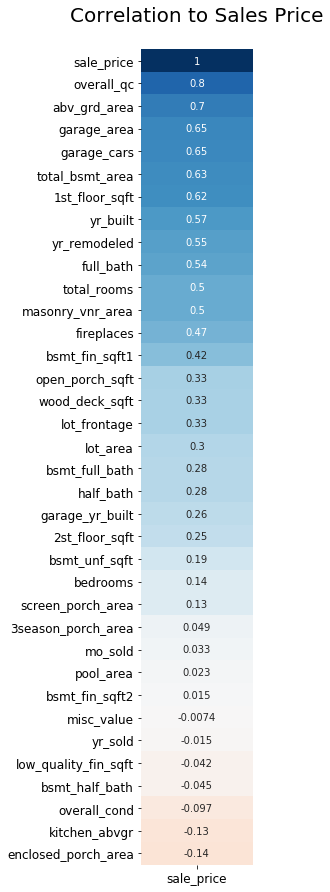

In [39]:
#Creating heatmap to see correlation to House Sale Price
#for all columns, excluding 'pid' column
plt.figure(figsize=(2, 15))
sns.heatmap(df.drop(['pid'], axis=1).
            corr()[['sale_price']].
            sort_values('sale_price', ascending=False), #sorting the features in descending order 
            cmap='RdBu', #color of the map (red/blue)
            vmin=-1, #Values to anchor the colormap are from -1 to 1
            vmax=1,
            annot=True, #writing the data value in each cell
           cbar=False); #no colorbar drawing

#Setting the title to size 20 and xticks and yticks to size 12
plt.title('Correlation to Sales Price\n', size = 20);
plt.yticks(size = 12);
plt.xticks(size = 12);

**Interpretation:**  
The above heatmap shows that the highest positive correlation to sale price are: overall quality, total square footage, garage area, garage cars, total basement area, 1st floor area, year built and year remodeled.  
The top negative correlations to the model are: enclosed porch area, kitchen above ground,  but the correlation is so small that I have not included them in the model completely. 

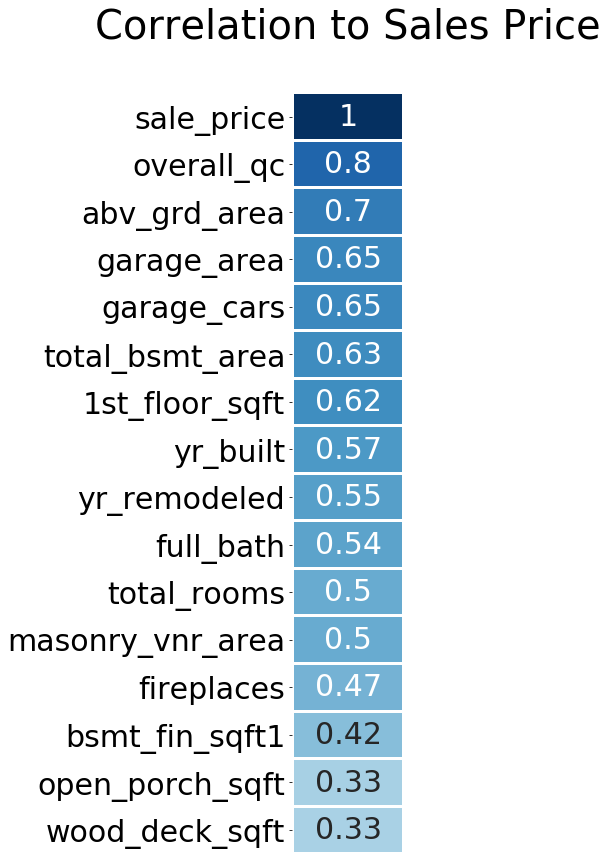

In [40]:
#Creating heatmap for the presentaion only with top correlations,
#excluding 'pid' column, for only those correlations to sale price that above 0.326
plt.figure(figsize=(2, 14))
presentation_corr = df.drop(['pid'], axis=1).corr()[['sale_price']].sort_values('sale_price', ascending=False)

#setting a heatmap only for those columns with correlation higher then 0.326
sns.heatmap(presentation_corr[presentation_corr['sale_price']> 0.326],
            cmap='RdBu', #color set to red/blue
            vmin=-1,  #Values to anchor the colormap are from -1 to 1
            vmax=1,
            annot=True,
            annot_kws={"size": 30}, #writing the data value in each cell, big enough to be visible in the presentation
           cbar=False,  #no colorbar drawing
           linewidths=2, linecolor='white'); #creating additional line between heatmap cells,for better visualization

#Creating title for the plot
plt.title('Correlation to Sales Price\n', size = 40);
#Encreasing the size of ticks to 30, so they can be visible for the presentation
plt.yticks(size = 30);
#Removing xticks
plt.xticks(ticks = []);

**Note:**  
After creating top features with highest correlation to sale price,I am trying to visualize that correlation and look for possible outliers.

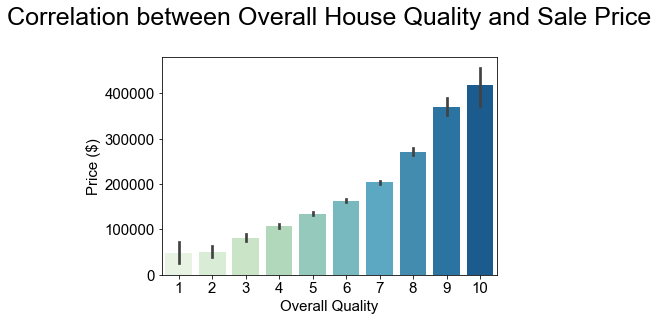

In [41]:
# viewing the correlation between overall house Quality 
# and its Sale Price

sns.barplot(data = df, 
            x = df['overall_qc'], 
            y = 'sale_price',
           palette="GnBu");
#setting the grid
sns.set_style("whitegrid")

#setting the title with size 25
plt.title('Correlation between Overall House Quality and Sale Price\n',
         size=25);
#creating xlabel and ylabel and setting them to size 15
plt.ylabel('Price ($)', size=15);
plt.xlabel('Overall Quality', size=15);

#setting xticks and yticks to size 15
plt.yticks(size = 15);
plt.xticks(size = 15);

**Interpretation:**  
Overall quality effects the price, the higher the quality the higher the price.

In [42]:
#Sorting data by neighborhood and by highest average sales price
price_by_neighborhood = df.groupby(by = 'neighborhood')[['sale_price']].mean().\
                    sort_values(by= 'sale_price', ascending = False).reset_index()

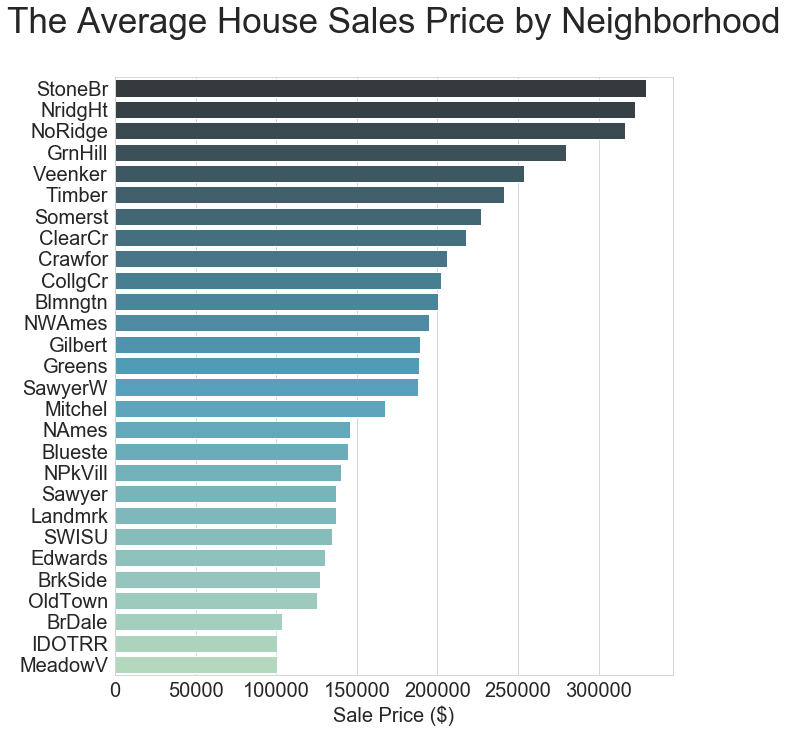

In [43]:
#Plotting the Average House Price by Neighborhood
#setting the figure size
plt.figure(figsize=(10,11))
#seting the grid to whitegrid
sns.set_style("whitegrid")

sns.barplot(data=price_by_neighborhood, #mean of sale price of neighborhoods sorted by sale price
            x= 'sale_price', 
            y='neighborhood', 
            palette="GnBu_d") ;

#Setting the title to size 35
plt.title ('The Average House Sales Price by Neighborhood\n', 
           size=35);

#removing ylabel
plt.ylabel('');

#Renaming xlabel and setting it to size 20
plt.xlabel('Sale Price ($)', size = 20);

#setting size of yticks and xticks to 20
plt.yticks(size = 20);
plt.xticks(size = 20);

**Observation:**
There is a range between the neighborhoods. The mean minimum and maximum of saleprice by neighborhood are 100,000 and 360,000 respectfully. 

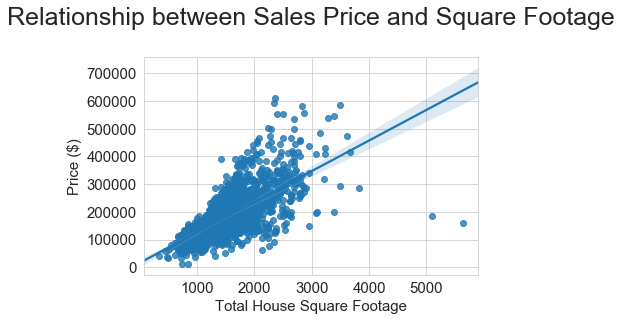

In [44]:
# Vewing relationship between house sales price
# and total area above groud
sns.regplot(data = df, x = 'abv_grd_area', y = 'sale_price');
sns.set_style("whitegrid")

#Setting the title to size 35
plt.title ('Relationship between Sales Price and Square Footage\n',
           size=25);

#Renaming xlabel and ylabel setting it to size 15
plt.ylabel('Price ($)', size = 15);
plt.xlabel('Total House Square Footage',size = 15);

#setting size of yticks and xticks to 15
plt.yticks(size = 15);
plt.xticks(size = 15);

**Observation:**  
There is a linear relationship between the total square footage of the house and its sale price.  
There are several outliers with above ground house square footage area more than 4_000.  
Need to delete these rows.

In [45]:
#removing the rows with abv_grd_area more than 4_000
df.drop(df[df['abv_grd_area'] > 4_000].index, 
             inplace = True)

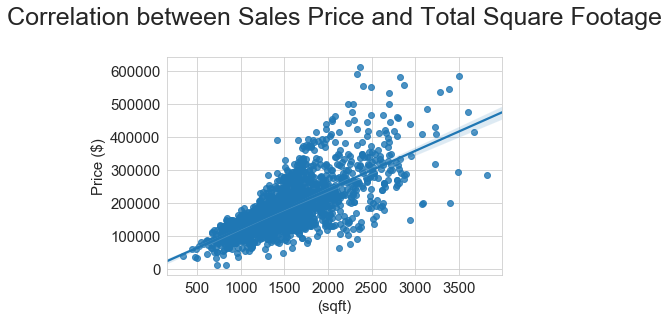

In [46]:
# Vewing AGAIN relationship between house sales price
# and total area above groud
sns.regplot(data = df, x = 'abv_grd_area', y = 'sale_price');
sns.set_style("whitegrid")

#Setting the title to size 35
plt.title ('Correlation between Sales Price and Total Square Footage\n', 
           size=25);

#Renaming xlabel and ylabel setting it to size 15
plt.ylabel('Price ($)',size = 15);
plt.xlabel('(sqft)', size = 15);

#setting size of yticks and xticks to 15
plt.yticks(size = 15);
plt.xticks(size = 15);

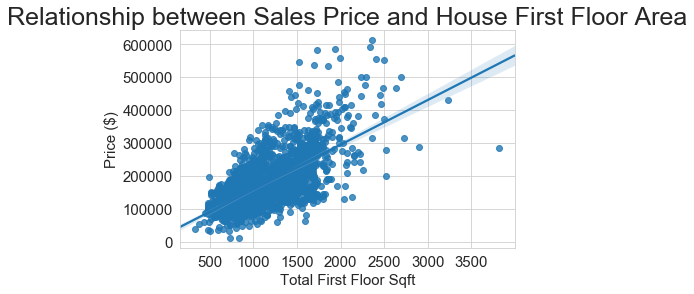

In [47]:
# Vewing relationship between house sales price
# and house first floor area
sns.regplot(data = df, 
                x = '1st_floor_sqft', 
                y = 'sale_price');
sns.set_style("whitegrid")

#Setting the title to size 25
plt.title ('Relationship between Sales Price and House First Floor Area',
           size=25);

#Renaming xlabel and ylabel setting it to size 15
plt.ylabel('Price ($)', size = 15);
plt.xlabel('Total First Floor Sqft', size = 15);

#setting size of yticks and xticks to 15
plt.yticks(size = 15);
plt.xticks(size = 15);

**Observation:**  
There is a linear relationship between the total first floor square footage of the house and its sale price.  
There are several outliers with above first floor area more than 3_000. Need to delete these rows.

In [48]:
#removing the rows with 1st_floor_sqft more than 3_000
df.drop(df[df['1st_floor_sqft'] > 3_000].index, 
             inplace = True)

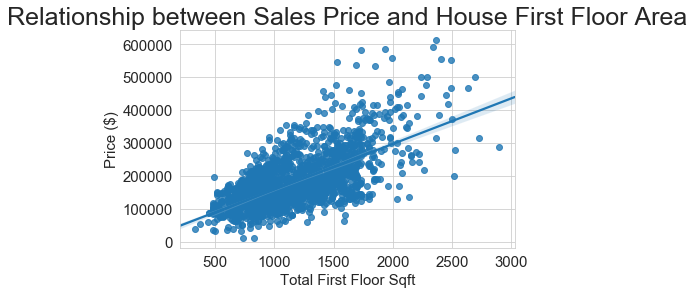

In [49]:
# Vewing AGAIN relationship between house sales price
# and house first floor area
sns.regplot(data = df, 
                x = '1st_floor_sqft', 
                y = 'sale_price');
sns.set_style("whitegrid")

#Setting the title to size 25
plt.title ('Relationship between Sales Price and House First Floor Area',
           size=25);

#Renaming xlabel and ylabel setting it to size 15
plt.ylabel('Price ($)', size = 15);
plt.xlabel('Total First Floor Sqft', size=15);

#setting size of yticks and xticks to 15
plt.yticks(size = 15);
plt.xticks(size = 15);

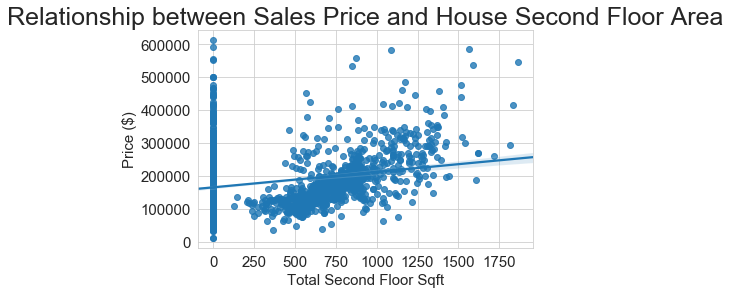

In [50]:
# Vewing relationship between house sales price
# and house second floor area
sns.regplot(data = df, x = '2st_floor_sqft', y = 'sale_price');
sns.set_style("whitegrid")

#Setting the title to size 25
plt.title ('Relationship between Sales Price and House Second Floor Area',
           size=25);

#Renaming xlabel and ylabel setting it to size 15
plt.ylabel('Price ($)',size = 15);
plt.xlabel('Total Second Floor Sqft', size=15);

#setting size of yticks and xticks to 15
plt.yticks(size = 15);
plt.xticks(size = 15);

**Observation:**  
There is a linear relationship between the total second floor square footage of the house and its sale price. 

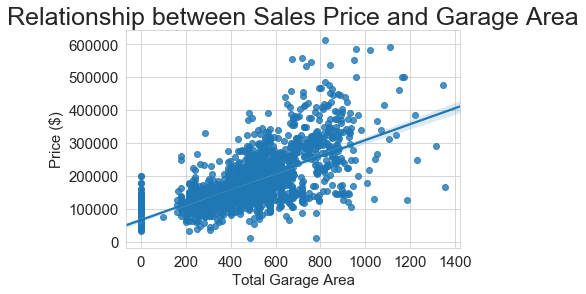

In [51]:
# Vewing relationship between house sales price
# and total garage area
sns.regplot(data = df, x = 'garage_area', y = 'sale_price');
sns.set_style("whitegrid")
#setting the title with size 25
plt.title ('Relationship between Sales Price and Garage Area',
           size=25);

#creating xlabel and ylabel and setting them to size 15
plt.ylabel('Price ($)', size=15);
plt.xlabel('Total Garage Area', size =15);

#setting xticks and yticks to size 15
plt.yticks(size = 15);
plt.xticks(size = 15);

**Observation:**  
There is a linear relationship between the total garage area of the house and its sale price. 

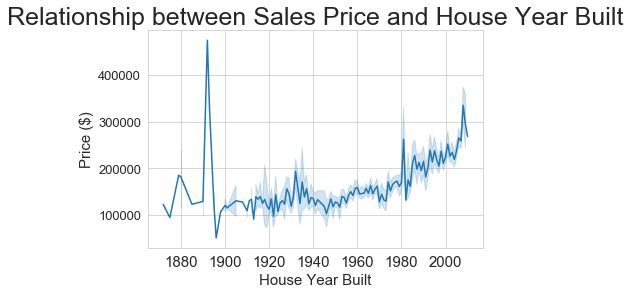

In [52]:
#Relationship between Sales Price and House Year Built
sns.lineplot(data = df, x="yr_built", y="sale_price");
sns.set_style("whitegrid")

#setting the title with size 25
plt.title ('Relationship between Sales Price and House Year Built',
           size=25);

#creating xlabel and ylabel and setting them to size 15
plt.ylabel('Price ($)', size=15);
plt.xlabel('House Year Built', size=15);

#setting xticks and yticks to size 15
plt.yticks(size = 13);
plt.xticks(size = 15);

**Observation:**  
There is a linear relationship between the year built of the house and its sale price. With years, house depreciates and the value lowers down. But there are outliers between years 1890 and 1900. Need to look deeper into it.

In [53]:
#checking the outlier for 'yr_built' column for the years
df[(df['yr_built']>1890) & (df['yr_built']<1900) &
   (df['sale_price']>200_000)][['sale_price',
                           'yr_built',
                            'yr_remodeled']].sort_values(by='sale_price', ascending=False)

,sale_price,yr_built,yr_remodeled
id,,,
2667,475000,1892,1993
1321,325000,1893,2000


**Observation:**
It looks like that these houses were recently remodeled and hold more of a historical value, that is why their sale price hiked so much up. I am deciding to remove those two house from our observation because they are aside of the rest of the trend of data.

In [54]:
#Removing these outliers
df.drop(df[(df['yr_built']>1890) & (df['yr_built']<1900) &
           (df['sale_price']>200_000)].index, inplace = True)

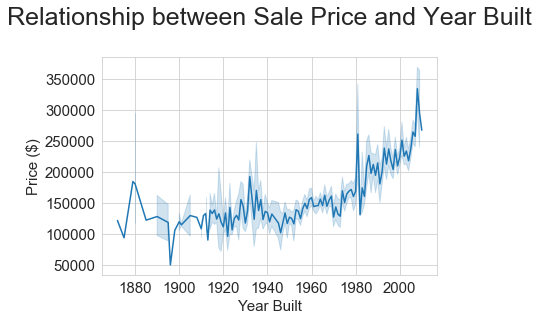

In [55]:
#Reploting the Relationship between Sales Price and House Year Built again
sns.lineplot(data = df, x="yr_built", y="sale_price");
sns.set_style("whitegrid")

#setting the title with size 25
plt.title ('Relationship between Sale Price and Year Built\n',
           size=25);

#creating xlabel and ylabel and setting them to size 15
plt.ylabel('Price ($)', size=15);
plt.xlabel('Year Built', size=15);
#setting xticks and yticks to size 15
plt.yticks(size = 15);
plt.xticks(size = 15);

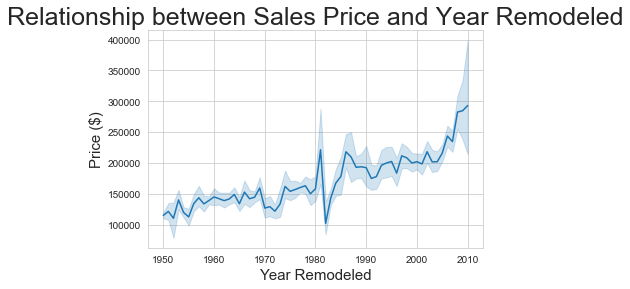

In [56]:
#Relationship between Sales Price and House Year Remodeled 
sns.lineplot(data = df, x="yr_remodeled", y="sale_price");
sns.set_style("whitegrid")

#setting the title with size 25
plt.title ('Relationship between Sales Price and Year Remodeled',
           size=25);

#creating xlabel and ylabel and setting them to size 15
plt.ylabel('Price ($)', size=15);
plt.xlabel('Year Remodeled',  size=15);

**Observation:**   
There is a linear relationship between the year remodeled of the house and its sale price. Will use this column in my feature engineering.

---

## Feature Engineering

### Interactions (Synergies) Creation

**Note:**
Trying to create Interactions with columns with highest correlations to sale price.   
I found 7 interactions/synergies that have even higher correlation to sale price than their correlation to sale price individually.  These interaction columns will be the core to my future models.

In [57]:
# Calculating Interaction (synergy) btw overall quality and total sqft
df['synergy_overallqc_sqft'] = df['overall_qc'] * df['abv_grd_area']
test_df['synergy_overallqc_sqft'] = test_df['overall_qc'] * test_df ['abv_grd_area']

#Calculating Interactionf btw total rooms and number of full baths
#for each dataframes
df['synergy_rooms_bath'] = df['total_rooms'] * df['full_bath']
test_df['synergy_rooms_bath'] = test_df['total_rooms'] * test_df['full_bath']

#Calculating Interactionf btw total basement sqft and garage sqft
#for each dataframe
df['synergy_bsmtarea_garagearea'] = df['total_bsmt_area'] * df['garage_area']
test_df['synergy_bsmtarea_garagearea'] = test_df['total_bsmt_area'] * test_df['garage_area']

#Calculating Interactionf btw number of garage cars and first floor sqft
#for each dataframes
df['synergy_garagecar_1stfloorsqft'] = df['garage_cars'] * df['1st_floor_sqft']
test_df['synergy_garagecar_1stfloorsqft'] = test_df['garage_cars'] * test_df['1st_floor_sqft']

#Calculating Interactionf btw house year built and year remodeled
#for each dataframes
df['synergy_yrbuilt_yrremodeled'] = df['yr_built'] * df['yr_remodeled']
test_df['synergy_yrbuilt_yrremodeled'] = test_df['yr_built'] * test_df['yr_remodeled']

#Calculating Interactionf btw masonry veneer area and fireplaces
#for each dataframes
df['synergy_masonry_fireplaces'] = df['masonry_vnr_area'] * df['fireplaces']
test_df['synergy_masonry_fireplaces'] = test_df['masonry_vnr_area'] * test_df['fireplaces']

#Calculating Interactionf btw open porch square footage and wooden deck square footage
#for each dataframes
df['synergy_openporch_wooddeck'] = df['open_porch_sqft'] * df['wood_deck_sqft']
test_df['synergy_openporch_wooddeck'] = test_df['open_porch_sqft'] * test_df['wood_deck_sqft']

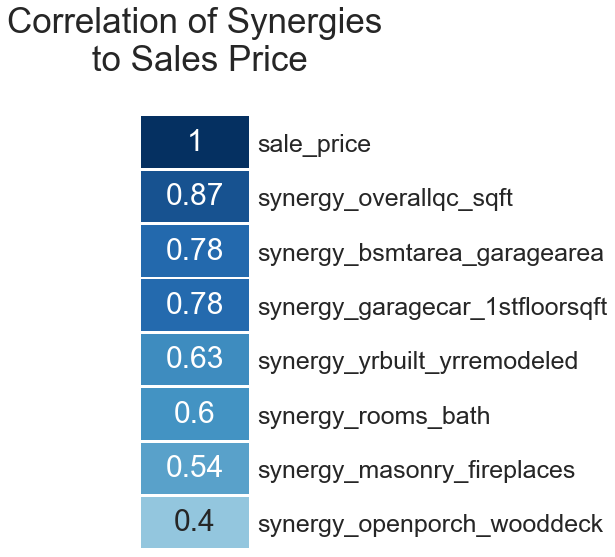

In [58]:
#Creating heatmap to see correlation to House Sale Price
#the following columns:
 
#setting the list of all the synergy columns names
synergy_features = ['synergy_overallqc_sqft',
                    'synergy_rooms_bath', 
                    'synergy_bsmtarea_garagearea',
                    'synergy_garagecar_1stfloorsqft',
                    'synergy_yrbuilt_yrremodeled',
                    'synergy_masonry_fireplaces', 
                    'synergy_openporch_wooddeck']

#adding 'sale_price' column to list of all synergy columns to create the heatmap
heatmap_features = synergy_features + ['sale_price']

#setting size of the figure
plt.figure(figsize=(2, 8))
ax = sns.heatmap(df[heatmap_features].
            corr()[['sale_price']].
            sort_values('sale_price', ascending=False),
            cmap='RdBu',
            vmin=-1,
            vmax=1,
            annot=True,
            annot_kws={"size": 30}, #setting annotation to 30, for the presentation
           cbar=False,
           linewidths=2, linecolor='white'); #creating a line, so see the annotations better

#setting size of the title to 35
plt.title('Correlation of Synergies\n to Sales Price\n', size = 35);

#moving ticks of y-axis to the right side, for the presentation
ax.tick_params(axis='y', labelleft = False, labelright=True, rotation=0)

#seting the size of yticks to 25 and removing xticks
plt.yticks(size = 25);
plt.xticks(ticks = []);

**Note:**  
The correlation between synergies and sale price is much higher than the individual correlations between columns (included in the synergies) and sale price.  
I have not created any more 'synergy' columns, since i have not seen much of an impact on the model.

### Dummie Variable Creation

In [59]:
#Creating a function to create dummies, murge them to df and
#return the list of dummies.
#Function takes the dataframe and list of columns to create dummies
#and returns the updated dataframe with dummies as well as the dummie columns list
def create_dummies(df, list_columns):
    dummies = pd.get_dummies(df[list_columns],
                             drop_first=True)
    
    #seeting a list of dummies before the merge, so we can add it to the features 
    #in our models
    dummies_list = list(dummies.columns)
    
    #merging all the dummies to our dataframe
    df = df.merge(dummies, 
              left_index=True, 
              right_index=True)
    
    return df, dummies_list 


In [60]:
#Creating list of all column names with object values, to create dummies for them all
#creating a new list to which will append column names with object variables
object_column_list =list()

#Creating list of all column names with object values
for col in df.columns: 
    if df[col].dtype == object:
        object_column_list.append(col)

In [61]:
#checking the list of column names with object variables
print(object_column_list)

['ms_subclass', 'ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition1', 'condition2', 'bldg_type', 'house_style', 'roof_style', 'roof_material', 'exterior1', 'exterior2', 'masonry_vnr_type', 'exter_qc', 'exter_cond', 'foundation', 'bsmt_qc', 'bsmt_cond', 'bsmt_exposure', 'bsmt_fin_type1', 'bsmt_fin_type2', 'heating', 'heating_qc', 'centail_air', 'electr_system', 'kitchen_qc', 'functional', 'fireplace_qc', 'garage_type', 'garage_finish', 'garage_qc', 'garage_cond', 'paved_drway', 'pool_qc', 'fence_qc', 'misc_feature', 'sale_type']


In [62]:
#Creating dummies for df using function 'create_dummies'

#creating dummies for train dataframe
df, list_dummies = create_dummies(df, object_column_list)

#creating dummies for test dataframe
test_df, list_test_dummies = create_dummies(test_df, object_column_list)

#creating the list of all features that we will input in our models
#which includes interaction/synergy columns along with dummie columns
features = synergy_features + list_dummies


## Preprocessing

In [63]:
# Creating columns that are missing in one dataframe 
# and adding them to another dataframe
#(credit to Noah C.)

#Finding columns that are not in test dataframe
cols_not_in_test = set(df.columns) - set(test_df.columns)
#Finding columns that are not in the train dataframe
col_not_in_train = set(test_df.columns) - set(df.columns)

#Setting attaching missing columns in df (from test_df)
#Assigning zero to all values in these columns
for col in cols_not_in_test:
    test_df[col] = 0
    
#Setting attaching missing columns in test_df (from df)
#Assigning zero to all values in these columns
for col in col_not_in_train:
    df[col] = 0

#Checking if the length of both dataframes is the same
print(len(df.columns))
print(len(test_df.columns))

334
334


---

## Modeling

In [64]:
#Creating functions to calculate and print metrics for a model

# defining a function for calculating R2 ADJUSTED
# r2_adj = 1 - (1 - R^2)*(n-1)/(n-p-1)
# where n is number of observations in sample and 
# p is number of independent variables in model

def r2_adj(y, preds, num_of_variables):
    n = len(y) #n - is number of observations in sample
    p = num_of_variables #setting number of variables to 'p'
    
    #calculating R squared adjusted
    r2_adj = 1 - (1 - r2_score(y, preds))*(n-1)/(n-p-1)
    
    #returning the value of calculated R squared adjusted
    return r2_adj 

# function to calculate and print regression metrics:
# R2, RMSE, R2sqrd, when p- number of variables
def print_metrics(y, preds, p):
    #calculating R squared
    r2 = r2_score(y, preds)
    
    #calculating RMSE score
    rmse = np.sqrt(mean_squared_error(y, preds))
    
    #calculatinf R squared adjusted
    r2adj = r2_adj(y, preds, p)
    
    #printing all above metrics one by one
    print("R2: {0:.3f}".format(r2))
    print("R2adj: {0:.3f}".format(r2adj))
    print ("RMSE: {0:.3f}".format(rmse))
    
    return r2, rmse, r2adj

### Linear Regression

In [65]:
#Taking all the features into our model
#(interactions and Dummie columns)
X = df[features]
y = df['sale_price']

#initiating a multiple regression model
lr = LinearRegression()

#randomly subset of rows into to dataframes: train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#checking how the split worked
print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape = {X_test.shape}')
print('----------------')

#using cross validation score to have an additional check on our model
cv_score = cross_val_score(lr, X_train, y_train, cv=5).mean()
print(f'cross validation score = {cv_score}')

#Fit the model to the training data, 
lr.fit(X_train, y_train);

#Evaluate the training and test scores:
#Train score
print(f'R-squared train set = {lr.score(X_train, y_train)}')

#Test score
print(f'R-squared test set = {lr.score(X_test, y_test)}')
print('----------------')


X_train.shape = (1533, 245)
X_test.shape = (511, 245)
----------------
cross validation score = 0.904070613905709
R-squared train set = 0.9395417558220088
R-squared test set = 0.9133299594897517
----------------


In [66]:
#Calculating all the predictions by our lr model for test
predictions_train = lr.predict(X_train)

#Printing metrics for test
print('Metrics for train:')
print_metrics(y_train, predictions_train, len(features));

Metrics for train:
R2: 0.940
R2adj: 0.928
RMSE: 19508.738


In [67]:
#Calculating all the predictions by our lr model for test
predictions_test = lr.predict(X_test)

#Printing metrics for test 
print('Metrics for test:')
print_metrics(y_test, predictions_test, len(features));

Metrics for test:
R2: 0.913
R2adj: 0.833
RMSE: 22728.109


**Observation:**  
Based on our model metrics, this is a low bias model.  
91% of variability in the data are explained by our model.  
RMSE (standard diviation of residuals) is 22,728, which is also quite good since our sale price vary from 12,789 to 611,657.

In [68]:
#Finding all the coefficients that our model created
#credit to Noah C.
coef_df = pd.DataFrame({
    'column':features,
    'coef':lr.coef_,
    'abs_coef':np.abs(lr.coef_)
})

In [69]:
#Sorting those coefficient by 'coef' columnand viewing top 15
#credit to Noah C.
data = coef_df.sort_values(by = 'coef', ascending = False).head(15)

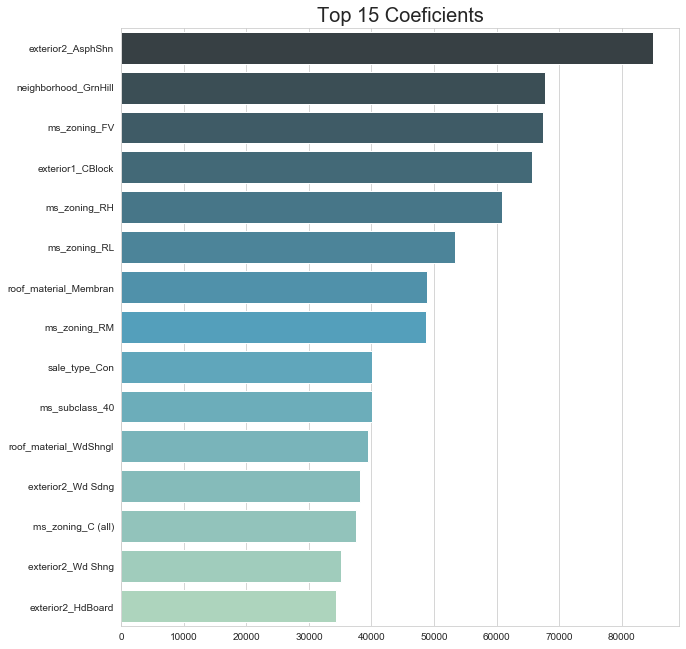

In [70]:
#Visualizing top coefficients of the Linear Regression Model, 
#to pick those that are usefull for renovation recommendations 
#for Mary and Ira's house
plt.figure(figsize=(10,11))
sns.set_style("whitegrid")

sns.barplot(data=data, 
            x='coef', 
            y='column', 
            palette="GnBu_d") ;

#setting sise of the title to 20
plt.title ('Top 15 Coeficients', 
           size=20);

#Removing the xlabel and ylabel
plt.ylabel('');
plt.xlabel('');

**Observation:**  
Since some of the top coefficients are neighborehood and zoning, that cant be changed for a particulalar house, I picked the following recommentdations. 

    "Consider upgrading the following features with highest effect on sale price:
      - Exterior: Asphalt Shingles / Cinder Block / Brick Common
      - Roof Material:  Membrane 
      - Heating: Hot water or steam heat"


**Note:**  
I have created a nice Linear Regression Model, but now I want to see if Ridge or Lasso Regression Models can help me to improve predictions and metrics. 

### Ridge Regression 

In [71]:
# Instantiate Standard Scaler.
sc = StandardScaler()

# Fit and transform Standard Scaler to overfit data in one step.
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [72]:
#RIDGE REGRESSION MODEL
# Instantiate Ridge Regression Modell
ridge = Ridge(alpha=10)

# Fit into Ridge Model
ridge.fit(Z_train, y_train)

# Evaluate model using R2.
print(f'Ridge Regression Model - R squared Z train {ridge.score(Z_train, y_train)}')
print(f'Ridge Regression Model - R squared Z test {ridge.score(Z_test, y_test)}')

Ridge Regression Model - R squared Z train 0.9390906756942834
Ridge Regression Model - R squared Z test 0.9181451328409787


**Observation:**  
The Ridge Model metrics are just as good as metrics of Linear Regression Model.

### Lasso Regression

In [73]:
#LASSO REGRESSION MODEL
# Set up a list of Lasso alphas to check.
lasso_alphas = np.logspace(0, 10, 100)

# Cross-validate over our list of Lasso alphas.
lasso = LassoCV(alphas=lasso_alphas,
               cv=5,
               max_iter=5000)

# Fit model using best ridge alpha!
lasso.fit(Z_train, y_train)

# Printing our R2 for Lasso Regression Model
print(f'Lasso Regression Model - R squared Z train {lasso.score(Z_train, y_train)}')
print(f'Lasso Regression Model - R squared Z test {lasso.score(Z_test, y_test)}')

Lasso Regression Model - R squared Z train 0.9347362074729437
Lasso Regression Model - R squared Z test 0.9246306923334633


**Observation:**  
All my models performed similarly good with Lasso slightly better.   
The LRM R^2 is about 0.93 and 0.91 train and test respectfully, and Lasso R^2 is 0.93 and 0.92 for train and test respectfully.  
Since all models performed similar I am going to use original linear regression model for Kaggle competition.

## Friends House Sale Price Prediction (for presentation)

In [74]:
#My friends house is in the test_df under index '2718'
friend_house = test_df.loc[[2718]]

#Setting no limits to number of columns to view
pd.set_option('display.max_columns', None)

#Vewing the house details
friend_house

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition1,condition2,bldg_type,house_style,overall_qc,overall_cond,yr_built,yr_remodeled,roof_style,roof_material,exterior1,exterior2,masonry_vnr_type,masonry_vnr_area,exter_qc,exter_cond,foundation,bsmt_qc,bsmt_cond,bsmt_exposure,bsmt_fin_type1,bsmt_fin_sqft1,bsmt_fin_type2,bsmt_fin_sqft2,bsmt_unf_sqft,total_bsmt_area,heating,heating_qc,centail_air,electr_system,1st_floor_sqft,2st_floor_sqft,low_quality_fin_sqft,abv_grd_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedrooms,kitchen_abvgr,kitchen_qc,total_rooms,functional,fireplaces,fireplace_qc,garage_type,garage_yr_built,garage_finish,garage_cars,garage_area,garage_qc,garage_cond,paved_drway,wood_deck_sqft,open_porch_sqft,enclosed_porch_area,3season_porch_area,screen_porch_area,pool_area,pool_qc,fence_qc,misc_feature,misc_value,mo_sold,yr_sold,sale_type,synergy_overallqc_sqft,synergy_rooms_bath,synergy_bsmtarea_garagearea,synergy_garagecar_1stfloorsqft,synergy_yrbuilt_yrremodeled,synergy_masonry_fireplaces,synergy_openporch_wooddeck,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,alley_No Alley,alley_Pave,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,land_contour_HLS,land_contour_Low,land_contour_Lvl,utilities_NoSewr,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,land_slope_Mod,land_slope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Norm,condition2_PosA,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_material_Metal,roof_material_Roll,roof_material_Tar&Grv,roof_material_WdShake,roof_material_WdShngl,exterior1_AsphShn,exterior1_BrkComm,exterior1_BrkFace,exterior1_CemntBd,exterior1_HdBoard,exterior1_MetalSd,exterior1_Plywood,exterior1_PreCast,exterior1_Stucco,exterior1_VinylSd,exterior1_Wd Sdng,exterior1_WdShing,exterior2_AsphShn,exterior2_Brk Cmn,exterior2_BrkFace,exterior2_CBlock,exterior2_CmentBd,exterior2_HdBoard,exterior2_ImStucc,exterior2_MetalSd,exterior2_Other,exterior2_Plywood,exterior2_PreCast,exterior2_Stucco,exterior2_VinylSd,exterior2_Wd Sdng,exterior2_Wd Shng,masonry_vnr_type_BrkFace,masonry_vnr_type_CBlock,masonry_vnr_type_None,masonry_vnr_type_Stone,exter_qc_Fa,exter_qc_Gd,exter_qc_TA,exter_cond_Fa,exter_cond_Gd,exter_cond_Po,exter_cond_TA,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmt_qc_Fa,bsmt_qc_Gd,bsmt_qc_No Basement,bsmt_qc_Po,bsmt_qc_TA,bsmt_cond_Gd,bsmt_cond_No Basement,bsmt_cond_TA,bsmt_exposure_Gd,bsmt_exposure_Mn,bsmt_exposure_No,bsmt_exposure_No Basement,bsmt_fin_type1_BLQ,bsmt_fin_type1_GLQ,bsmt_fin_type1_LwQ,bsmt_fin_type1_No Basement,bsmt_fin_type1_Rec,bsmt_fin_type1_Unf,bsmt_fin_type2_BLQ,bsmt_fin_type2_GLQ,bsmt_fin_type2_LwQ,bsmt_fin_type2_No Basement,bsmt_fin_type2_Rec,bsmt_fin_type2_Unf,heating_GasA,heating_GasW,heating_Grav,heating_qc_Fa,heating_qc_Gd,heating_qc_TA,ce

In [75]:
#Predicting the price of my friends house
lr.predict(friend_house[features])

array([170224.47502921])

**Observation:**  
1. The predicted sales price of the house is $170,224.


## Kaggle Competition Test Predictions

In [76]:
#Calculating predictions for the test_df for Kaggle competition
#Assigining only 'featured' columns from test_df to X_kaggle
X_kaggle = test_df[features]

#Using Linear Regression model created above, predicting the house sale price
#for houses in test_df dataframe and adding them to a new column 'SalePrice'
X_kaggle['SalePrice'] = lr.predict(X_kaggle)

#checking the size of the test_df after the predictions addition
print(f'test_df.shape = {test_df.shape}')

#Creating a new file with predictions to a new file
# called 'Kaggle_submission'
output = X_kaggle[['SalePrice']];
output.to_csv('../data/Kaggle_submission.csv');

#checking the size of the output before submission
output.shape

test_df.shape = (878, 334)


/Users/juliev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


(878, 1)

## Conclusions and Recommendations

By using Ames Housing Train Dataset, I created three models (Linear Regression, Ridge and Lasso) that identifies predictions of sale price of all houses in Test Dataset.  All three models performed similarly well in predicting housing sale price based on all house features in Ames Train Dataset. I used Linear Regression model in predicting house sale price in Test dataframe, in which Mary and Ira houses details as well. This predictions were submitted to Kaggle Competition, scorring 42nd among 121 total.


**The metrics of the Linear Regression Model used for predictions are:**
1. R^2 train = 0.94
2. R^2 test = 0.91
3. RMSE train = 19,508
4. RMSE test = 22,728  

**Conclusion on a model performance:**  
The model is low bias. The metrics on train dataset is a bit higher than on a test dataframe, meaning that the model is a little bit overfit. 

Based on Linear Regression model the predicted price of the house of Mary and Ira is 170,224 dollars. 

The following recommendations were given to Mary and Ira:

    "Consider upgrading the following features with highest effect on sale price:
      - Exterior: Asphalt Shingles / Cinder Block / Brick Common
      - Roof Material:  Membrane 
      - Heating: Hot water or steam heat"

 